Import important libraries for our analysis

In [29]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np

**Task #1:** *Merge the 12 months of sales data into a single CSV file.*

In [63]:
all_data = pd.read_csv("C://Users//xrist//OneDrive//Υπολογιστής//Sales_Data_Csv//Sales_April_2019.csv")

files = [file for file in os.listdir('C://Users//xrist//OneDrive//Υπολογιστής//Sales_Data_Csv')]

all_months_data = pd.DataFrame()

for file in files:
    all_data = pd.read_csv('C://Users//xrist//OneDrive//Υπολογιστής//Sales_Data_Csv//' + file, on_bad_lines='skip')
    all_months_data = pd.concat([all_months_data, all_data])

Save the merged data

In [32]:
all_months_data.to_csv("all_data.csv", index = False)

In [33]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

Read in updated dataframe

In [90]:
df = pd.read_csv("all_data.csv")
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


Let's make a copy of df

In [142]:
df2 = df.copy()

**Data Cleaning Process**

> Replace the space between columns names with "-".

In [96]:
df.columns = df.columns.str.replace(' ', '_')

>Due to the merge of data we also pass the columns names to data

In [163]:
df = df.replace('Order ID', np.NaN)
df = df.replace('Product', np.NaN)
df = df.replace('Quantity Ordered', np.NaN)
df = df.replace('Price Each', np.NaN)
df = df.replace('Order Date', np.NaN)
df = df.replace('Purchase Address', np.NaN)
df = df.replace('Or', np.NaN)

> Drop the columns where all their values are *NULL*

In [165]:
df.dropna(how = 'all', inplace = True)

> We split the column *Purchase_Address* into three columns *Address, City, PostCode*.

In [202]:
df[['Address', 'City', 'PostCode']] = df['Purchase_Address'].str.split(',', expand = True)

> We drop the column *Purchase Address* because we don't need it anymore.

In [228]:
df = df.drop(['Purchase_Address'], axis = 1)

> Add a *Month* Column

In [ ]:
df['Month'] = df['Order_Date'].str[0:2]

> Add a *Total* column that contains *Price_Each* column multiple with *Quantity_Ordered* column.

In [175]:
df['Total'] = df['Price_Each'] * df['Quantity_Ordered']

##### **Question #1** ######################

**Question #1.1:** *What was the best month of sales? How much was earned this month?*

> Convert the column *Price_Each* to float

In [168]:
df['Price_Each'] = pd.to_numeric(df['Price_Each'])

> Convert the column *Quantity_Ordered* to int

In [174]:
df['Quantity_Ordered'] = df['Quantity_Ordered'].astype(int)

In [169]:
df_grouped_month = df.groupby('Month')

In [178]:
sales_month = df_grouped_month['Total'].apply(lambda x : x.sum())

In [184]:
sales_month

Month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total, dtype: float64

*Visualization*

Text(0.5, 1.0, 'Month Sales')

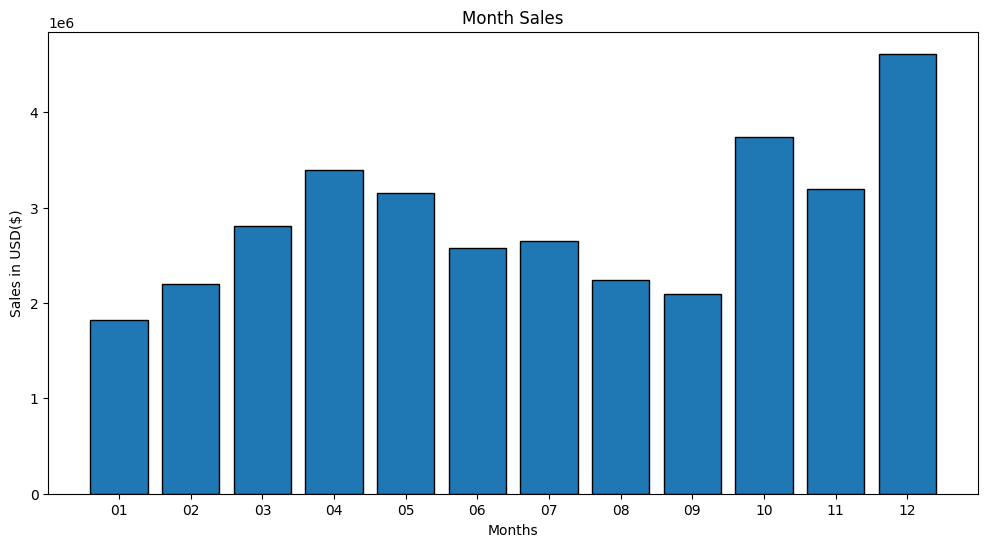

In [196]:
plt.figure(figsize = (12, 6))
plt.bar(sales_month.index, sales_month, edgecolor = 'black')
plt.xlabel('Months')
plt.ylabel('Sales in USD($)')
plt.title('Month Sales')

**TODO**: Summer Sales VS Winter Sales

**Answer #1:** The best month of sales was *December* with the total of **4,613,443.34 $**.

$$
~
$$

##### **Question #2** #####

**Question #2.1:** *What city sold the most product?*


   **Question #2.2:** *What city had the highest number of sales?*

In [212]:
city_grouped = df.groupby(by = 'City').sum()
city_grouped

C:\Users\xrist\AppData\Local\Temp\ipykernel_3916\4266229472.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_grouped = df.groupby(by = 'City').sum()


,Quantity_Ordered,Price_Each,Total
City,,,
Atlanta,16602,2779908.20,2795498.58
Austin,11153,1809873.61,1819581.75
Boston,22528,3637409.77,3661642.01
Dallas,16730,2752627.82,2767975.40
Los Angeles,33289,5421435.23,5452570.80
New York City,27932,4635370.83,4664317.43
Portland,14053,2307747.47,2320490.61
San Francisco,50239,8211461.74,8262203.91
Seattle,16553,2733296.01,2747755.48


*Visualization*

Text(0.5, 1.0, 'Sales per City')

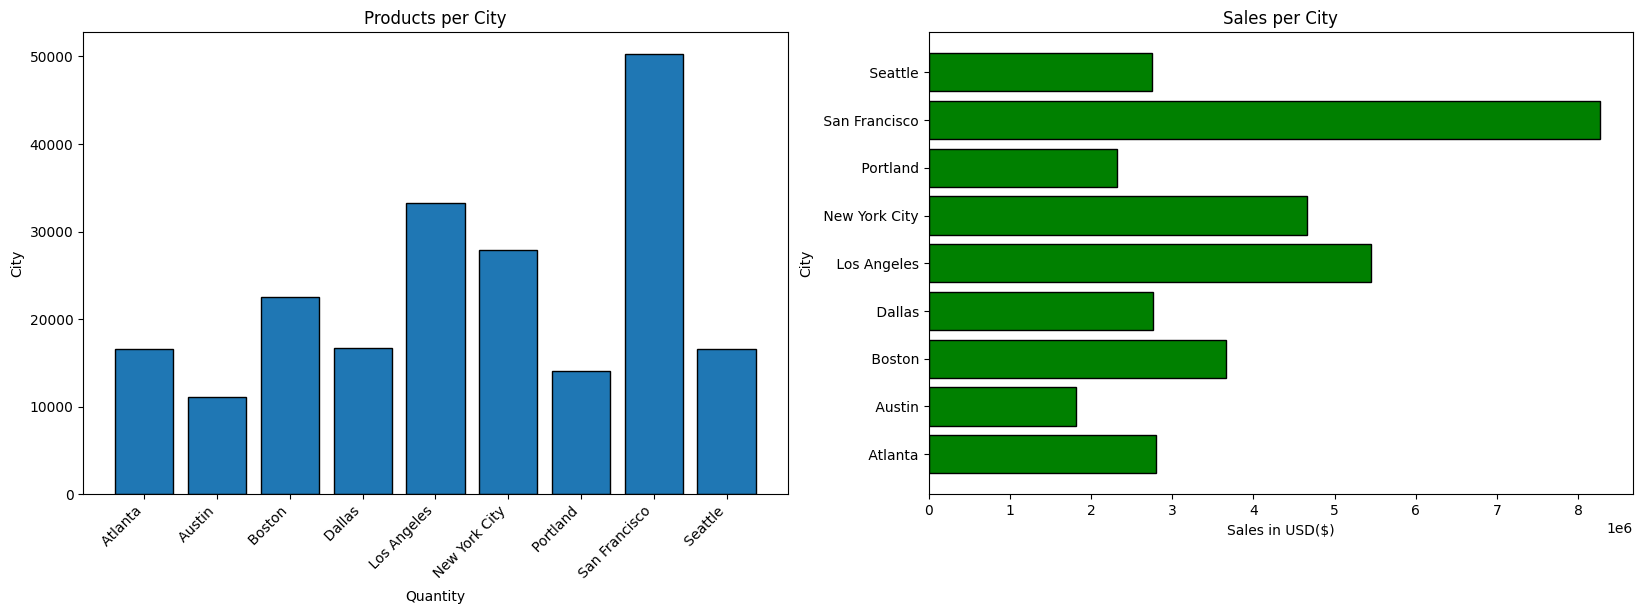

In [227]:
fig = plt.figure(figsize = (20,6))

plt.subplot(121)

plt.bar(city_grouped.index, city_grouped['Quantity_Ordered'], edgecolor = 'black')
plt.xlabel('Quantity')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('City')
plt.title('Products per City')

plt.subplot(122)

plt.barh(city_grouped.index, city_grouped['Total'], edgecolor = 'black', color = 'green')
plt.xlabel('Sales in USD($)')
plt.ylabel('City')
plt.title('Sales per City')

**Answer #2.1:** The city that sold the most product was *San Francisco* with the amount of **50239**.

**Answer #2.2:** The city that had the most sales was *San Francisco* with the total of **8262203.91 $**.

$$
~
$$

##### **Question #3** *What time should we display advertisements to maximize likelihood of customer's buying product?*

> Convert the column *Order_Date* to *datetime*.

In [263]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

>Add columns *Hour* and *Minute*

In [264]:
df['Hour'] = df['Order_Date'].dt.hour
df['Minute'] = df['Order_Date'].dt.minute

*Visualization*

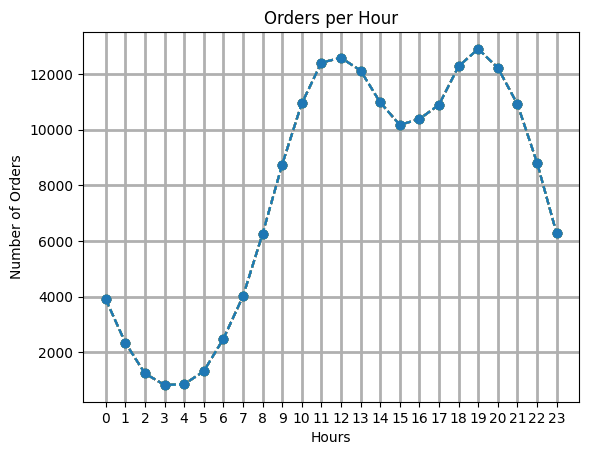

In [282]:
hours = [hour for hour, data in df.groupby('Hour')]

plt.plot(hours, df.groupby(['Hour']).count(), '--', marker = 'o')

plt.xlabel('Hours')
plt.xticks(hours)
plt.ylabel('Number of Orders')
plt.title('Orders per Hour')

plt.grid(linewidth = 2)

**Answer #3:** My recommendation is around **11am** and **7pm**.

$$
$$

##### **Question #4** *What products are most often sold together?*

> Change the type of column *Order ID* to int.

In [299]:
df['Order_ID'] = df['Order_ID'].astype(int)

> I create a temporary DataFrame named *dup_df* with **ALL** duplicated values.

In [326]:
dup_df = df[df['Order_ID'].duplicated(keep = False)]
dup_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Month,Total,Address,City,PostCode,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,04,600.00,669 Spruce St,Los Angeles,CA 90001,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,04,11.99,669 Spruce St,Los Angeles,CA 90001,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,04,600.00,20 Hill St,Los Angeles,CA 90001,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,04,11.95,20 Hill St,Los Angeles,CA 90001,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,04,99.99,823 Highland St,Boston,MA 02215,11,31
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,09,3.84,106 7th St,Atlanta,GA 30301,20,18
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,09,11.99,241 Highland St,Atlanta,GA 30301,0,25
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,09,5.98,241 Highland St,Atlanta,GA 30301,0,25
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,09,600.00,519 Maple St,San Francisco,CA 94016,13,49


> Add *Grouped* column to temporary *dup_df*.

In [327]:
dup_df['Grouped'] = dup_df.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\xrist\AppData\Local\Temp\ipykernel_3916\9300505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_df['Grouped'] = dup_df.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))


> Drop duplicates.

In [328]:
dup_df = dup_df[['Order_ID', 'Grouped']].drop_duplicates()

In [335]:
dup_df['Grouped'].value_counts()

iPhone,Lightning Charging Cable                                            882
Google Phone,USB-C Charging Cable                                          856
iPhone,Wired Headphones                                                    361
Vareebadd Phone,USB-C Charging Cable                                       312
Google Phone,Wired Headphones                                              303
                                                                          ... 
Google Phone,USB-C Charging Cable,Wired Headphones,USB-C Charging Cable      1
34in Ultrawide Monitor,LG Washing Machine                                    1
20in Monitor,iPhone                                                          1
Google Phone,USB-C Charging Cable,Wired Headphones,27in FHD Monitor          1
LG Washing Machine,AA Batteries (4-pack)                                     1
Name: Grouped, Length: 366, dtype: int64

**Answer #4:** The products *iPhone, Lightning Charging Cable* have the most sells combined.

$$
$$

##### **Question #5** *What products sold the most?*

In [330]:
product_group = df.groupby('Product')

In [337]:
quantity_ordered = product_group.sum()['Quantity_Ordered']

C:\Users\xrist\AppData\Local\Temp\ipykernel_3916\492676050.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity_Ordered']


In [340]:
products = [product for product, df in product_group]

*Visualization*

Text(0, 0.5, 'Quantity Ordered')

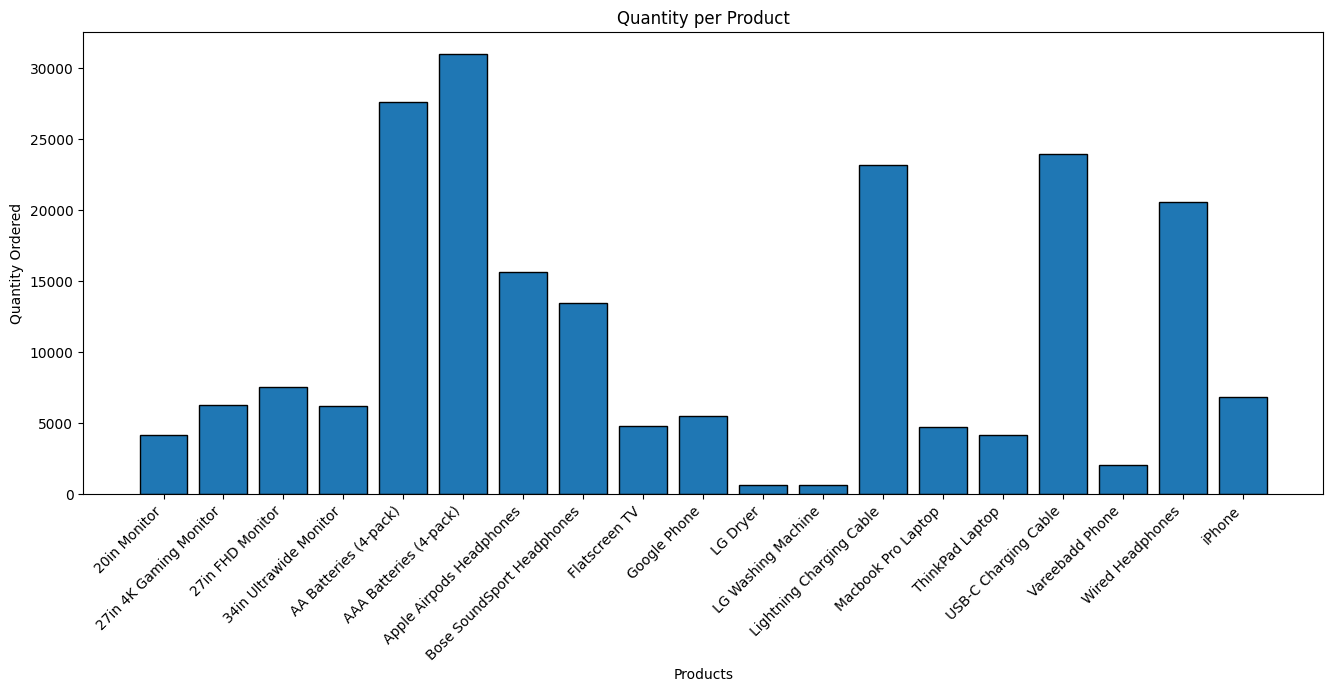

In [348]:
plt.figure(figsize = (16,6))

plt.bar(products, quantity_ordered, edgecolor = 'black')

plt.title('Quantity per Product')
plt.xlabel('Products')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Quantity Ordered')